# Import Packages

In [7]:
import numpy as np 
import matplotlib.pyplot as plt #https://matplotlib.org/stable/tutorials/images.html

import cv2 # computer vision, ML, image processing https://www.geeksforgeeks.org/opencv-python-tutorial/#getting
import random     # random.shaffle the list data https://www.w3schools.com/python/ref_random_shuffle.asp
import os     # https://www.tutorialsteacher.com/python/os-module#:~:text=The%20OS%20module%20in%20Python,with%20the%20underlying%20operating%20system.
import imageio # work with images https://imageio.readthedocs.io/en/stable/index.html
from collections import Counter # create a dictionary that stores labels as keys and their counts as values https://www.hackerrank.com/challenges/collections-counter/problem

from sklearn.model_selection import train_test_split #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
#from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold

from imblearn.over_sampling import SMOTE  #https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

from keras.models import Sequential # construct layers of neural network https://keras.io/guides/sequential_model/
from keras.layers import Dense, Dropout, Activation, Flatten # Activation - activation function; Flatten - https://keras.io/api/layers/reshaping_layers/flatten/
# Dense -  Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. Dense layer does the below operation on the input and return the output. https://keras.io/api/layers/core_layers/dense/

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization 
# Conv2D - 2D convolution layer https://keras.io/api/layers/convolution_layers/convolution2d/#:~:text=2D%20convolution%20layer%20(e.g.%20spatial,to%20the%20outputs%20as%20well.
# MaxPooling2D - https://keras.io/api/layers/pooling_layers/max_pooling2d/

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [60]:
for dirname, _, filenames in os.walk(r'C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset\IQ-OTH_NCCD lung cancer dataset.txt
C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset\Bengin cases\Bengin case (1).jpg
C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset\Bengin cases\Bengin case (10).jpg
C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset\Bengin cases\Bengin case (100).jpg
C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset\Bengin cases\Bengin case (101).jpg
C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_datase

Path to data:

In [18]:
directory = r'C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset' #r - for raw string (https://www.digitalocean.com/community/tutorials/python-raw-string)
categories = ['Bengin cases', 'Malignant cases', 'Normal cases'] # each category is a folder

# Image Size Variations

Create a dictionary: Category (e.g. Malignant): size(e.g. 512x512): number of images

In [20]:
size_data = {}
for i in categories:
    path = os.path.join(directory, i) # the path for each category e.g. /kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases
    print(path)
    class_num = categories.index(i) # the index in "categories" Benigh - 0, Malignant - 1, Normal - 2
    print(class_num)
    temp_dict = {}
    print(os.listdir(path)) # names of the files in each category(folder) as list ['Bengin case (1).jpg', 'Bengin case (10).jpg',...]
    for file in os.listdir(path):    # os.listdir(path) returns a list of files in each category folder 
        filepath = os.path.join(path, file) # the path for each jpg file
        print(filepath)
        height, width, channels = imageio.imread(filepath).shape # for each image: size + RGB (512 512 3)
        print(height, width, channels)
        if str(height) + ' x ' + str(width) in temp_dict: # add new sizes into the dictionary and count the images
            temp_dict[str(height) + ' x ' + str(width)] += 1 
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1
    print(temp_dict) # Benign {'512 x 512': 120} ; Malignant {'512 x 512': 501, '404 x 511': 1, '512 x 801': 28, '512 x 623': 31} ; Normal {'512 x 512': 415, '331 x 506': 1}
    size_data[i] = temp_dict # makes a dictionary where keys are the categories and values are dictionaries "temp_dict"
        
size_data

C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset\Bengin cases
0
['Bengin case (1).jpg', 'Bengin case (10).jpg', 'Bengin case (100).jpg', 'Bengin case (101).jpg', 'Bengin case (102).jpg', 'Bengin case (103).jpg', 'Bengin case (104).jpg', 'Bengin case (105).jpg', 'Bengin case (106).jpg', 'Bengin case (107).jpg', 'Bengin case (108).jpg', 'Bengin case (109).jpg', 'Bengin case (11).jpg', 'Bengin case (110).jpg', 'Bengin case (111).jpg', 'Bengin case (112).jpg', 'Bengin case (113).jpg', 'Bengin case (114).jpg', 'Bengin case (115).jpg', 'Bengin case (116).jpg', 'Bengin case (117).jpg', 'Bengin case (118).jpg', 'Bengin case (119).jpg', 'Bengin case (12).jpg', 'Bengin case (120).jpg', 'Bengin case (13).jpg', 'Bengin case (14).jpg', 'Bengin case (15).jpg', 'Bengin case (16).jpg', 'Bengin case (17).jpg', 'Bengin case (18).jpg', 'Bengin case (19).jpg', 'Bengin case (2).jpg', 'Bengin case (20).jpg', 'Beng

C:\Users\andre\AppData\Local\Temp\ipykernel_14484\75261297.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  height, width, channels = imageio.imread(filepath).shape # for each image: size + RGB (512 512 3)


512 512 3
C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset\Bengin cases\Bengin case (110).jpg
512 512 3
C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset\Bengin cases\Bengin case (111).jpg
512 512 3
C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset\Bengin cases\Bengin case (112).jpg
512 512 3
C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset\Bengin cases\Bengin case (113).jpg
512 512 3
C:\Users\andre\OneDrive\Documents\SPbPU-WelTec\SPB-PU\Course_project\data\The_IQ-OTHNCCD_lung_cancer_dataset\The_IQ-OTHNCCD_lung_cancer_dataset\Bengin cases\Bengin case (114).jpg
512 512 3
C:\Users\andre\OneDrive\Documents\SPbPU-WelTe

{'Bengin cases': {'512 x 512': 120},
 'Malignant cases': {'512 x 512': 501,
  '404 x 511': 1,
  '512 x 801': 28,
  '512 x 623': 31},
 'Normal cases': {'512 x 512': 415, '331 x 506': 1}}

Examples of images in each category

0 Bengin cases
(512, 512)
[[38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 ...
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]]


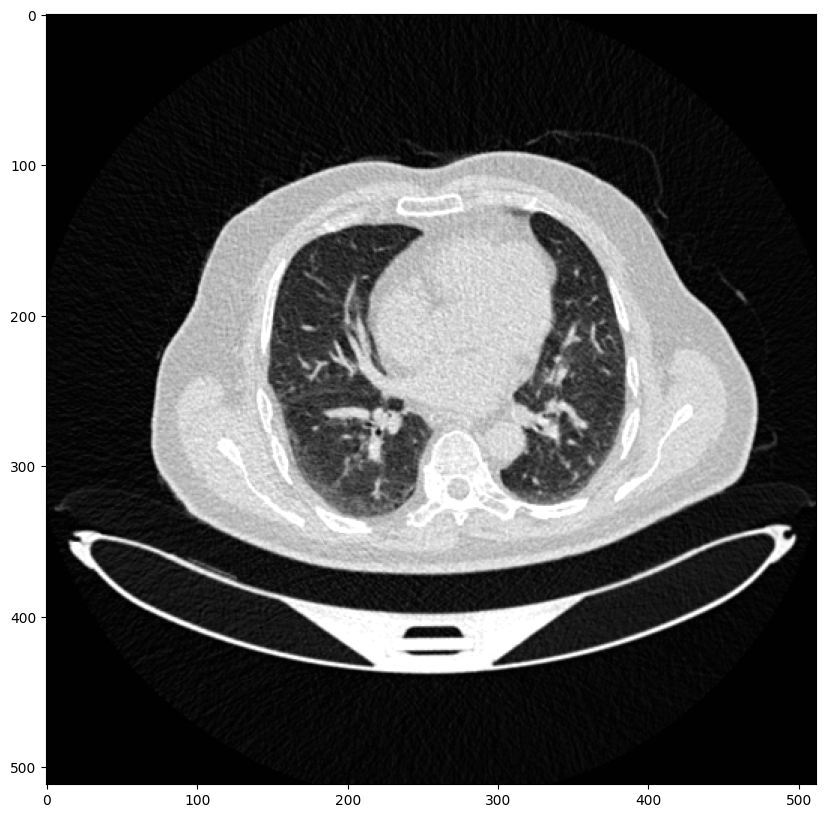

1 Malignant cases
(512, 512)
[[38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 ...
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]]


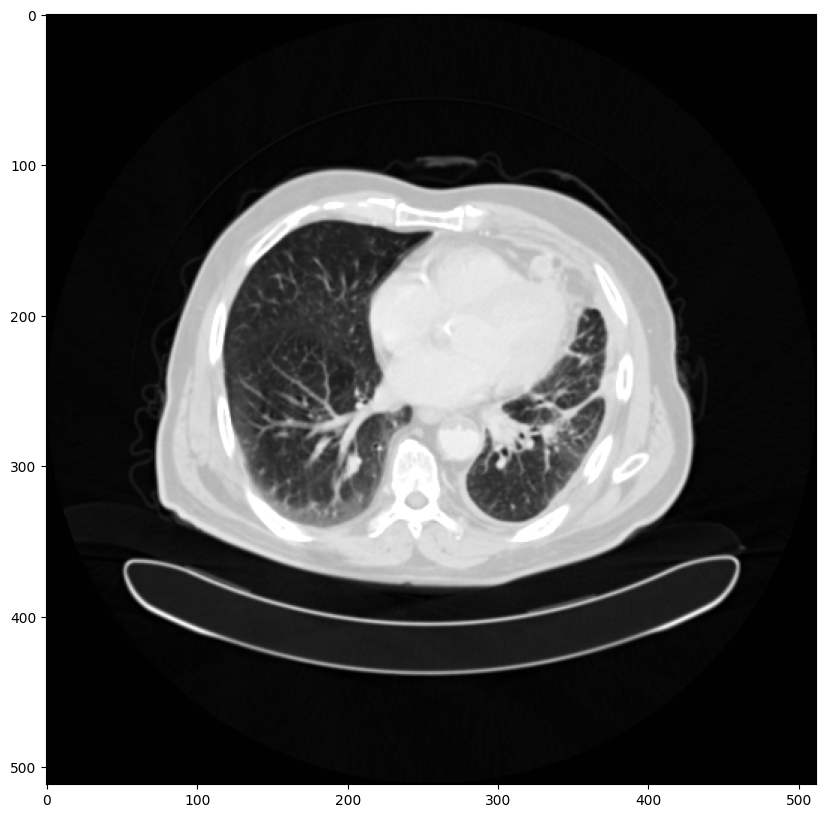

2 Normal cases
(512, 512)
[[38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 ...
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]
 [38 38 38 ... 38 38 38]]


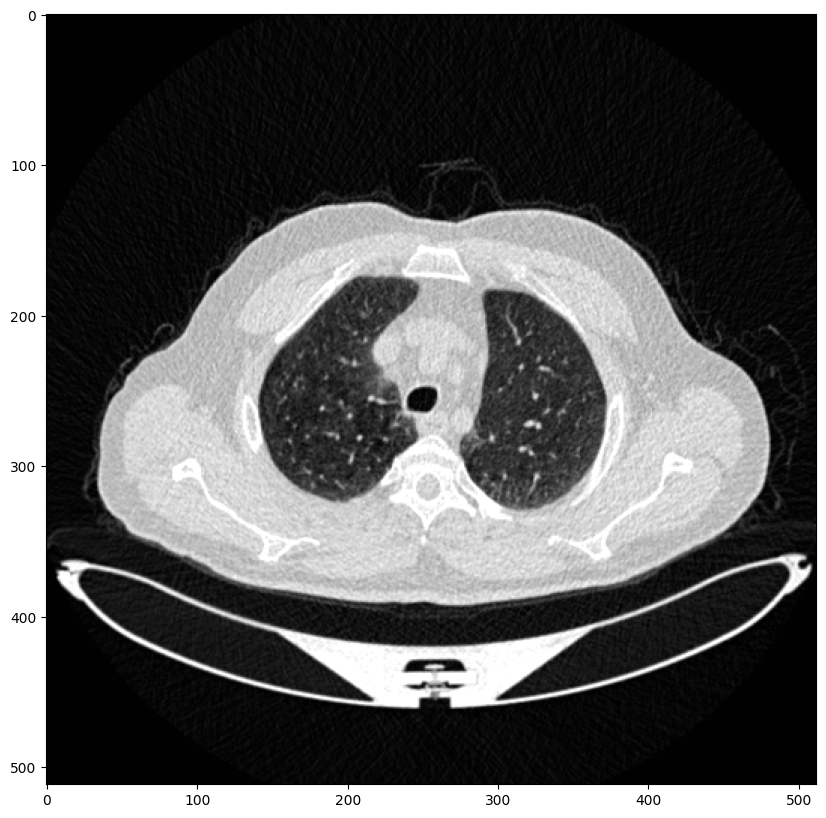

In [75]:
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(class_num, i)                      # category
        img = cv2.imread(filepath,0) # loads an image to img (array) The second parameter (flag) specifies the way how the image should be read.
        # 1 – a color image (default); 0 - in grayscale mode. More:  https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/ 
        print(img.shape)
        print(img)
        plt.figure(figsize = (10,10))
        plt.imshow(img, cmap='gray')               # show the image
        plt.show()
        break

In [67]:
with np.printoptions(threshold=np.inf): # full array for the last image above
    print(img)

[[ 38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
   38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
   38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
   38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
   38  38  38  38  38  38  38  38  47  51  63  55  48  56  62  60  60  62
   59  64  54  50  54  69  67  56  51  61  57  55  58  66  44  52  60  63
   62  49  63  63  46  61  53  61  49  73  61  50  60  58  54  55  63  60
   53  49  52  77  70  44  77  63  52  61  62  57  77  63  53  57  65  59
   65  54  71  49  61  69  63  64  50  65  70  42  78  77  71  59  70  53
   51  51  38  38  38  39  38  38  38  38  38  38  38  38  38  38  38  38
   38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
   38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
   38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
   38  38  38  38  38  38  38  38  38 

# Image Preprocessing and Testing

For each category show 3 examples of image processing (orginal image, resized and blurred)

0 Bengin case (1).jpg
1 Bengin case (10).jpg
2 Bengin case (100).jpg
0 Malignant case (1).jpg
1 Malignant case (10).jpg
2 Malignant case (100).jpg
0 Normal case (1).jpg
1 Normal case (10).jpg
2 Normal case (100).jpg


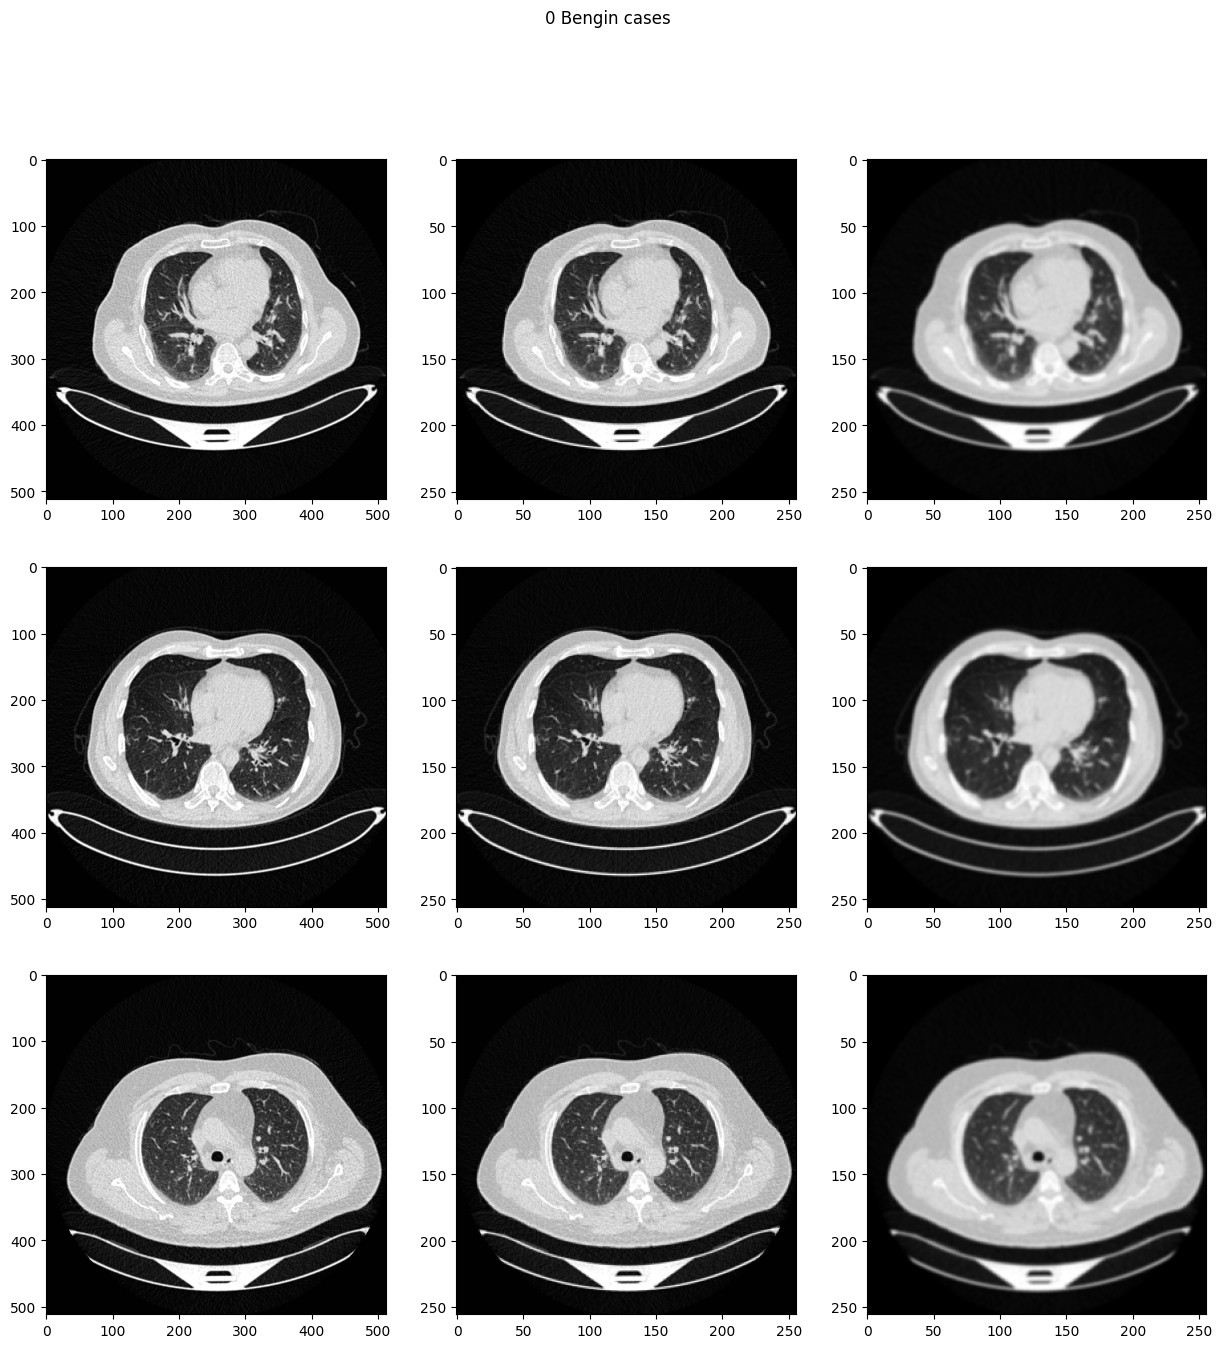

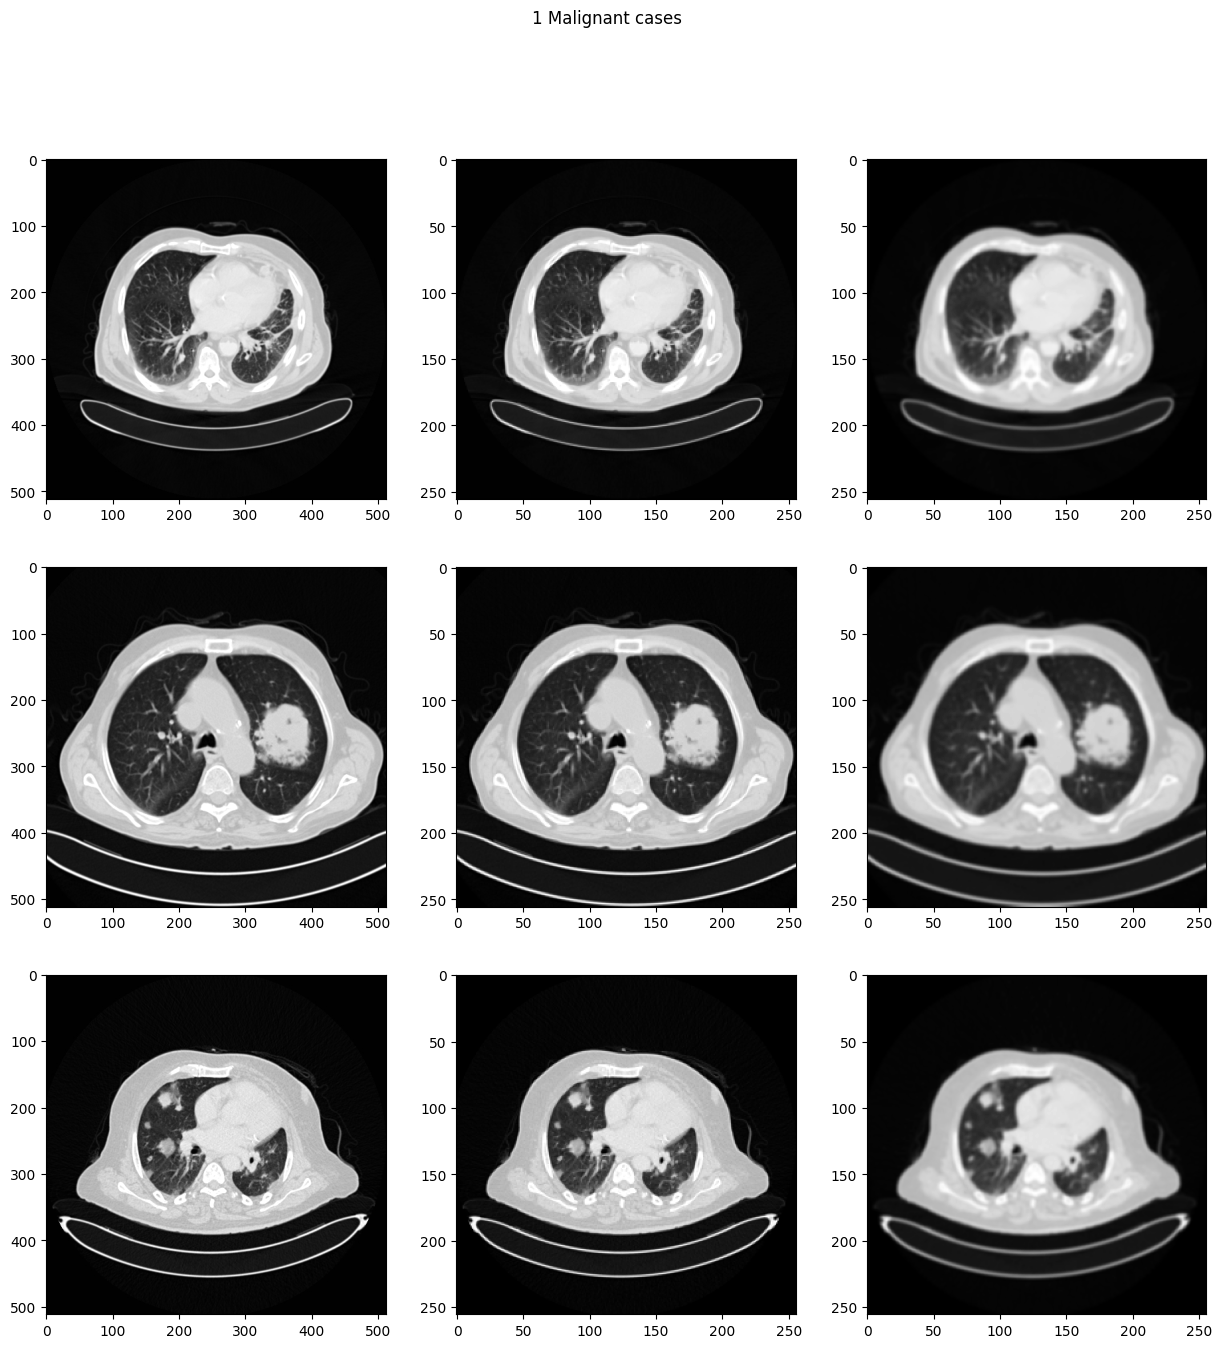

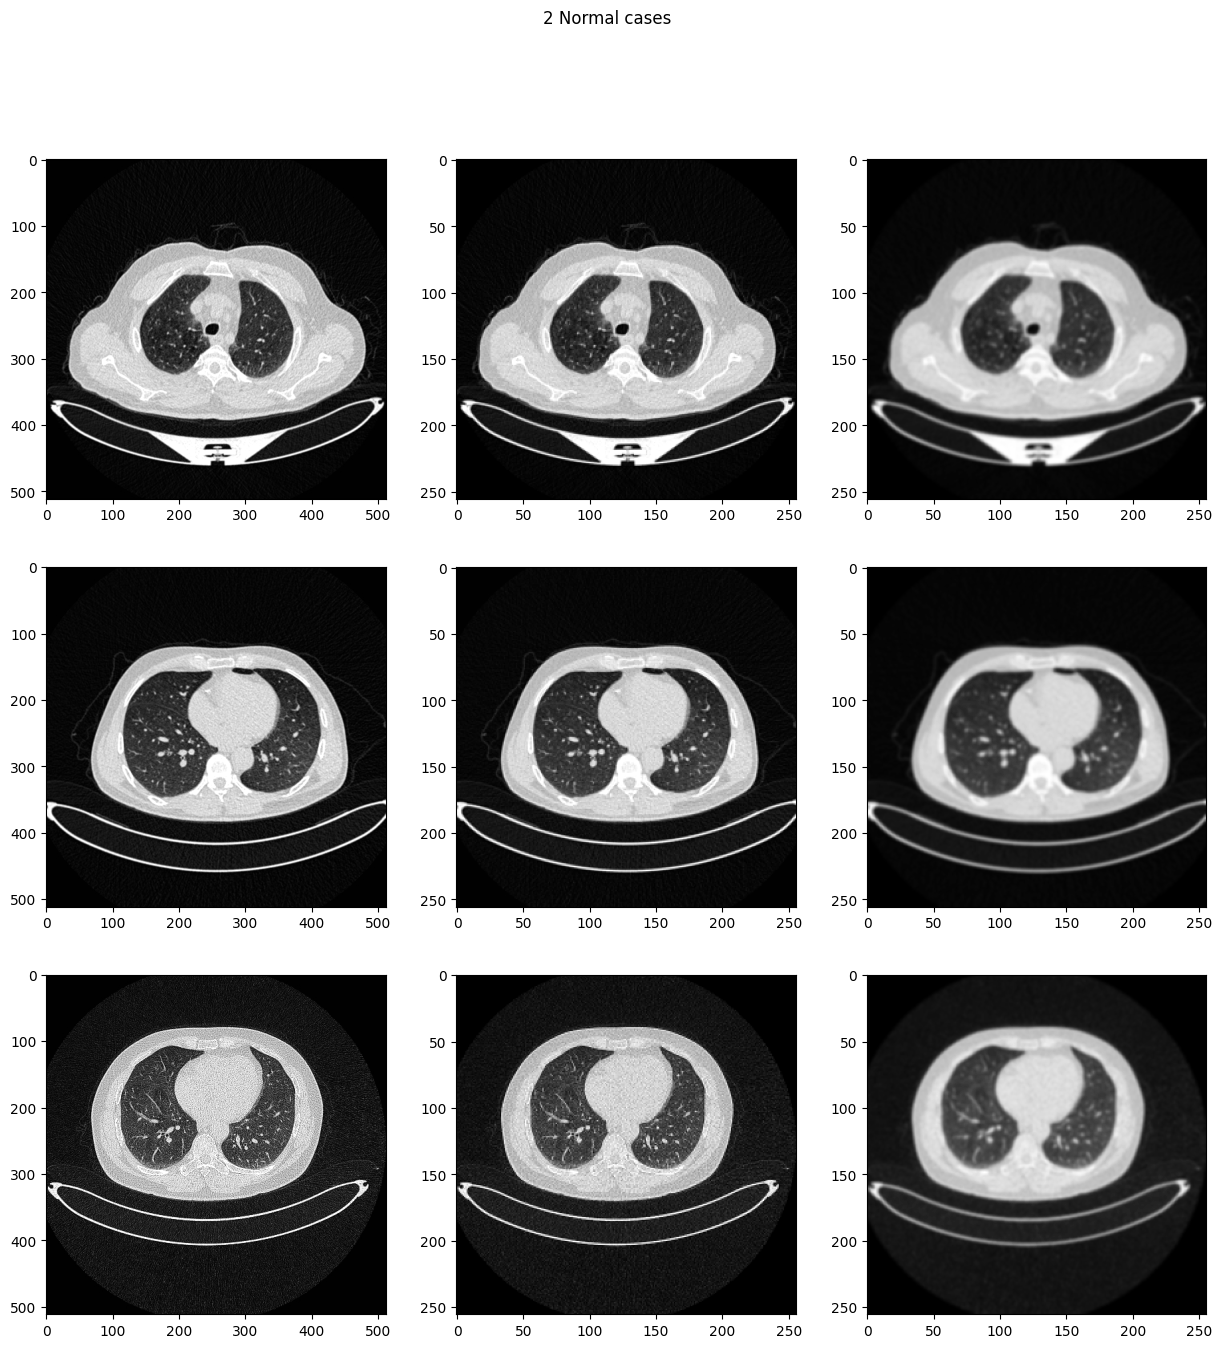

In [77]:
img_size = 256   # set the size of the image (height = width) 
for i in categories:
    class_num = categories.index(i)
    cnt, samples = 0, 3  #cnt defines the number of images to show (see below); samples define the number of rows
    fig, ax = plt.subplots(samples, 3, figsize=(15, 15))  # grid: 3 (height) X 3 (width)
    fig.suptitle(str(class_num)+" "+i)                                       # category name at the top
    
    path = os.path.join(directory, i)
    
    #print(os.listdir(path))
    for curr_cnt, file in enumerate(os.listdir(path)):     # enumerate iterates and counts elements (count, file)
        print(curr_cnt, file)
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0) # loads an image to img (array) The second parameter (flag) specifies the way how the image should be read.
        # 1 – a color image (default); 0 - in grayscale mode. More:  https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/ 
        
        img0 = cv2.resize(img, (img_size, img_size))      # resize the image https://www.geeksforgeeks.org/image-resizing-using-opencv-python/
        
        img1 = cv2.GaussianBlur(img0, (5, 5), 0)          # imply GaussianBlur https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/#gsc.tab=0
        
        ax[cnt, 0].imshow(img, cmap='gray')    # show the orginal image
        ax[cnt, 1].imshow(img0, cmap='gray')   # show the resized image
        ax[cnt, 2].imshow(img1, cmap='gray')   # show the blurred image
        cnt += 1
        if cnt == samples:
            break
        
plt.show()

# Preparing Data

The code np.array(X).reshape(-1, 256, 256, 1) is using NumPy to convert and reshape a 1D array (X) into a 4D array. The purpose of this operation is often related to preparing data for input into a convolutional neural network (CNN) or other machine learning models that expect input in the form of multi-dimensional arrays.

Here's a breakdown of the code:

np.array(X): Converts the variable X to a NumPy array.

.reshape(-1, 256, 256, 1): Reshapes the array into a 4D array with the specified shape (batch_size, height, width, channels).

-1: The use of -1 in one of the dimensions means that NumPy should automatically infer the size for that dimension based on the size of the original array and the other specified dimensions. In this case, it is inferring the batch size.

256, 256: Specifies the height and width of each 2D array in the 4D array.

1: Specifies that there is one channel. This is common for grayscale images; for color images, it would typically be 3 (for red, green, and blue channels).

So, the resulting array is a 4D array where each element represents a 2D image of size 256x256 with a single channel.

This kind of reshaping is common when working with image data in machine learning, especially when using frameworks like TensorFlow or PyTorch, where convolutional layers expect input in the form of 4D arrays. The -1 is useful when the number of samples is not known in advance, and you want NumPy to infer it based on the size of the original array.

In [84]:
data = []
img_size = 256

for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        # preprocess here
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, class_num])    # create a list of images + category 
        
random.shuffle(data)     # shaffle the list data https://www.w3schools.com/python/ref_random_shuffle.asp

X, y = [], [] 
for feature, label in data:     # create a list of features (images) and list of labels (categories)
    X.append(feature)
    y.append(label)
    
print('X length:', len(X))
print('y counts:', Counter(y)) # create a dictionary that stores labels as keys and their counts as values https://www.hackerrank.com/challenges/collections-counter/problem

# normalize
#print (X)

X = np.array(X).reshape(-1, img_size, img_size, 1) # from to list to array; from 2D array to 3D array; https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
X = X / 255.0

print (X[0].shape)
print (X)
y = np.array(y)

X length: 1097
y counts: Counter({1: 561, 2: 416, 0: 120})
(256, 256, 1)
[[[[0.14901961]
   [0.14901961]
   [0.14901961]
   ...
   [0.14901961]
   [0.14901961]
   [0.14901961]]

  [[0.14901961]
   [0.14901961]
   [0.14901961]
   ...
   [0.14901961]
   [0.14901961]
   [0.14901961]]

  [[0.14901961]
   [0.14901961]
   [0.14901961]
   ...
   [0.14901961]
   [0.14901961]
   [0.14901961]]

  ...

  [[0.14901961]
   [0.14901961]
   [0.14901961]
   ...
   [0.14901961]
   [0.14901961]
   [0.14901961]]

  [[0.14901961]
   [0.14901961]
   [0.14901961]
   ...
   [0.14901961]
   [0.14901961]
   [0.14901961]]

  [[0.14901961]
   [0.14901961]
   [0.14901961]
   ...
   [0.14901961]
   [0.14901961]
   [0.14901961]]]


 [[[0.14901961]
   [0.14901961]
   [0.14901961]
   ...
   [0.14901961]
   [0.14901961]
   [0.14901961]]

  [[0.14901961]
   [0.14901961]
   [0.14901961]
   ...
   [0.14901961]
   [0.14901961]
   [0.14901961]]

  [[0.14901961]
   [0.14901961]
   [0.14901961]
   ...
   [0.14901961]
   [0.1

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=10, stratify=y) #https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

print(len(X_train), X_train.shape)
print(len(X_valid), X_valid.shape)

822 (822, 256, 256, 1)
275 (275, 256, 256, 1)


In [57]:
X_valid[155]

array([[[0.14901961],
        [0.14901961],
        [0.14901961],
        ...,
        [0.14901961],
        [0.14901961],
        [0.14901961]],

       [[0.14901961],
        [0.14901961],
        [0.14901961],
        ...,
        [0.14901961],
        [0.14901961],
        [0.14901961]],

       [[0.14901961],
        [0.14901961],
        [0.14901961],
        ...,
        [0.14901961],
        [0.14901961],
        [0.14901961]],

       ...,

       [[0.14901961],
        [0.14901961],
        [0.14901961],
        ...,
        [0.14901961],
        [0.14901961],
        [0.14901961]],

       [[0.14901961],
        [0.14901961],
        [0.14901961],
        ...,
        [0.14901961],
        [0.14901961],
        [0.14901961]],

       [[0.14901961],
        [0.14901961],
        [0.14901961],
        ...,
        [0.14901961],
        [0.14901961],
        [0.14901961]]])

# Applying SMOTE to oversample the data

https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [25]:
print(Counter(y_train), Counter(y_valid))

Counter({1: 420, 2: 312, 0: 90}) Counter({1: 141, 2: 104, 0: 30})


In [26]:
print(len(X_train), X_train.shape)

X_train = X_train.reshape(X_train.shape[0], img_size*img_size*1)

print(len(X_train), X_train.shape)

822 (822, 256, 256, 1)
822 (822, 65536)


In [27]:
print('Before SMOTE:', Counter(y_train))
smote = SMOTE()
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)
print('After SMOTE:', Counter(y_train_sampled))

Before SMOTE: Counter({1: 420, 2: 312, 0: 90})
After SMOTE: Counter({2: 420, 1: 420, 0: 420})


In [28]:
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_train_sampled = X_train_sampled.reshape(X_train_sampled.shape[0], img_size, img_size, 1)

print(len(X_train), X_train.shape)
print(len(X_train_sampled), X_train_sampled.shape)

822 (822, 256, 256, 1)
1260 (1260, 256, 256, 1)


# Model Building with SMOTE data

In [29]:
model1 = Sequential() # construct layers of neural network https://keras.io/guides/sequential_model/

model1.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:])) #Conv2D - 2D convolution layer https://keras.io/api/layers/convolution_layers/convolution2d/#:~:text=2D%20convolution%20layer%20(e.g.%20spatial,to%20the%20outputs%20as%20well.
model1.add(Activation('relu'))    # # Activation - activation function
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))  ## MaxPooling2D - https://keras.io/api/layers/pooling_layers/max_pooling2d/

model1.add(Flatten())  # https://keras.io/api/layers/reshaping_layers/flatten/
model1.add(Dense(16))  # https://www.tutorialspoint.com/keras/keras_dense_layer.htm
model1.add(Dense(3, activation='softmax'))

model1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      640       
                                                                 
 activation (Activation)     (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)           

In [30]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history = model1.fit(X_train_sampled, y_train_sampled, batch_size=8, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10


158/158 [==============================] - 40s 248ms/step - loss: 0.5135 - accuracy: 0.8460 - val_loss: 0.1065 - val_accuracy: 0.9564
Epoch 2/10
158/158 [==============================] - 39s 248ms/step - loss: 0.0369 - accuracy: 0.9952 - val_loss: 0.0853 - val_accuracy: 0.9891
Epoch 3/10
158/158 [==============================] - 41s 259ms/step - loss: 0.0322 - accuracy: 0.9960 - val_loss: 0.0708 - val_accuracy: 0.9891
Epoch 4/10
158/158 [==============================] - 41s 258ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.1096 - val_accuracy: 0.9855
Epoch 5/10
158/158 [==============================] - 45s 287ms/step - loss: 0.0273 - accuracy: 0.9960 - val_loss: 0.1236 - val_accuracy: 0.9891
Epoch 6/10
158/158 [==============================] - 43s 270ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.0757 - val_accuracy: 0.9818
Epoch 7/10
158/158 [==============================] - 43s 270ms/step - loss: 6.1041e-05 - accuracy: 1.0000 - val_loss: 0.0909 - 

# Results

In [32]:
y_pred = model1.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 2s 188ms/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       1.00      1.00      1.00       141
           2       0.98      0.99      0.99       104

    accuracy                           0.99       275
   macro avg       0.98      0.97      0.98       275
weighted avg       0.99      0.99      0.99       275

[[ 28   0   2]
 [  0 141   0]
 [  1   0 103]]


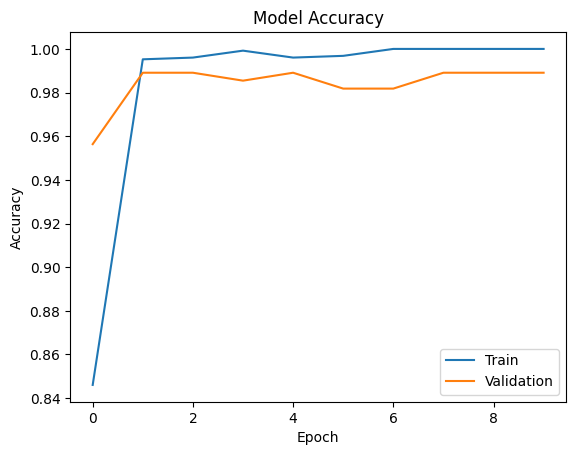

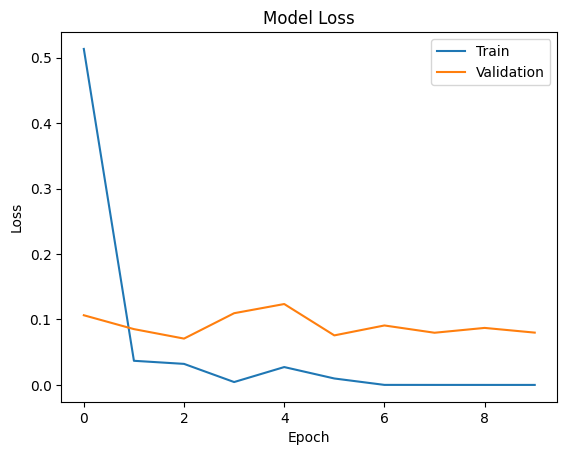

In [33]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Model Building with Class Weighted Approach

In [34]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(16))
model2.add(Dense(3, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 64)      640       
                                                                 
 activation_1 (Activation)   (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 


 conv2d_3 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 246016)            0         
                                                                 
 dense_2 (Dense)             (None, 16)                3936272   
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 3973891 (15.16 MB)
Trainable params: 3973891 (15.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
new_weights = {
    0: X_train.shape[0]/(3*Counter(y_train)[0]),
    1: X_train.shape[0]/(3*Counter(y_train)[1]),
    2: X_train.shape[0]/(3*Counter(y_train)[2]),
}

# new_weights[0] = 0.5
# new_weights[1] = 20

new_weights

{0: 3.0444444444444443, 1: 0.6523809523809524, 2: 0.8782051282051282}

In [37]:
history = model2.fit(X_train, y_train, batch_size=8, epochs=10, validation_data=(X_valid, y_valid), class_weight=new_weights)

Epoch 1/10
103/103 [==============================] - 26s 250ms/step - loss: 0.9026 - accuracy: 0.6606 - val_loss: 0.4463 - val_accuracy: 0.8618
Epoch 2/10
103/103 [==============================] - 26s 250ms/step - loss: 0.1738 - accuracy: 0.9513 - val_loss: 0.1082 - val_accuracy: 0.9782
Epoch 3/10
103/103 [==============================] - 26s 253ms/step - loss: 0.0559 - accuracy: 0.9903 - val_loss: 0.1834 - val_accuracy: 0.9564
Epoch 4/10
103/103 [==============================] - 27s 260ms/step - loss: 0.0747 - accuracy: 0.9866 - val_loss: 0.4339 - val_accuracy: 0.9055
Epoch 5/10
103/103 [==============================] - 27s 261ms/step - loss: 0.0579 - accuracy: 0.9830 - val_loss: 0.3101 - val_accuracy: 0.9673
Epoch 6/10
103/103 [==============================] - 29s 280ms/step - loss: 0.0352 - accuracy: 0.9939 - val_loss: 0.1201 - val_accuracy: 0.9745
Epoch 7/10
103/103 [==============================] - 27s 262ms/step - loss: 0.0404 - accuracy: 0.9939 - val_loss: 0.1233 - val_ac

# Results

In [38]:
y_pred = model2.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 2s 190ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.99      0.98      0.99       141
           2       0.97      0.98      0.98       104

    accuracy                           0.97       275
   macro avg       0.95      0.95      0.95       275
weighted avg       0.97      0.97      0.97       275

[[ 27   0   3]
 [  3 138   0]
 [  1   1 102]]


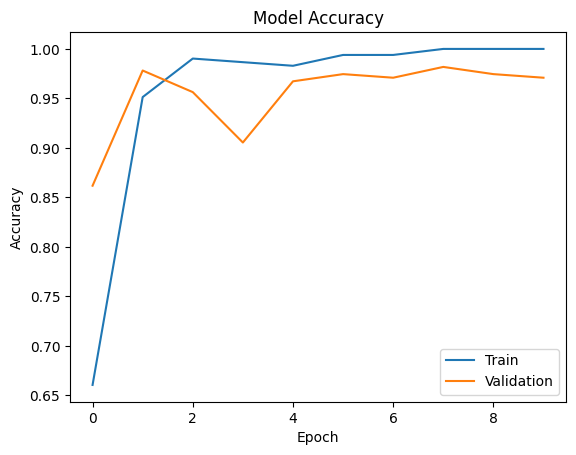

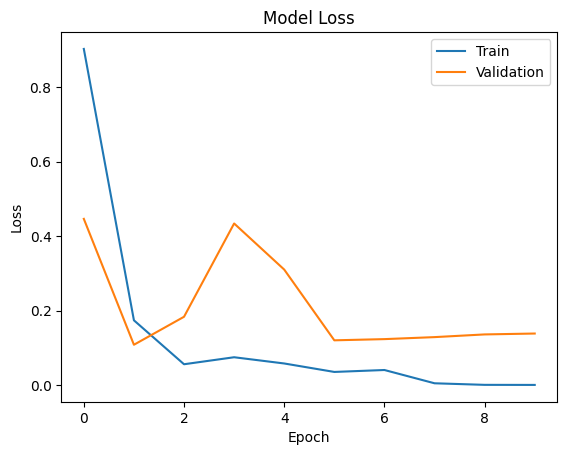

In [39]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Data Augmentation

https://en.wikipedia.org/wiki/Data_augmentation#:~:text=Data%20augmentation%20is%20a%20technique,modified%20copies%20of%20existing%20data.

In [40]:
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True) 
val_datagen = ImageDataGenerator()

In [41]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=8) 
val_generator = val_datagen.flow(X_valid, y_valid, batch_size=8)

In [42]:
model3 = Sequential()

model3.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(16))
model3.add(Dense(3, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      640       
                                                                 
 activation_2 (Activation)   (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 246016)           

In [43]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
history = model3.fit_generator(train_generator, epochs=5, validation_data=val_generator, class_weight=new_weights)

Epoch 1/5


C:\Users\andre\AppData\Local\Temp\ipykernel_14484\2485142853.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model3.fit_generator(train_generator, epochs=5, validation_data=val_generator, class_weight=new_weights)


103/103 [==============================] - 27s 254ms/step - loss: 1.3367 - accuracy: 0.5182 - val_loss: 1.1544 - val_accuracy: 0.4727
Epoch 2/5
103/103 [==============================] - 26s 257ms/step - loss: 0.7029 - accuracy: 0.7336 - val_loss: 0.7614 - val_accuracy: 0.6473
Epoch 3/5
103/103 [==============================] - 27s 263ms/step - loss: 0.3547 - accuracy: 0.8637 - val_loss: 0.4187 - val_accuracy: 0.8364
Epoch 4/5
103/103 [==============================] - 28s 272ms/step - loss: 0.3242 - accuracy: 0.9148 - val_loss: 0.3679 - val_accuracy: 0.8545
Epoch 5/5
103/103 [==============================] - 28s 273ms/step - loss: 0.2038 - accuracy: 0.9404 - val_loss: 0.3209 - val_accuracy: 0.8909


In [45]:
y_pred = model3.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))

print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))

9/9 [==============================] - 2s 179ms/step
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        30
           1       0.98      0.88      0.93       141
           2       0.86      0.94      0.90       104

    accuracy                           0.89       275
   macro avg       0.84      0.86      0.85       275
weighted avg       0.90      0.89      0.89       275

[[ 23   2   5]
 [  6 124  11]
 [  5   1  98]]


Save the models

In [46]:
# Save the trained model
model1.save('ct_scan_model1.h5')

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
# Save the trained model
model2.save('ct_scan_model2.h5')

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
# Save the trained model
model3.save('ct_scan_model3.h5')

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
